# Code to clean BigCode GitHub commits dataset

In [ ]:
!pip install ghdiff

In [ ]:
from datasets import load_dataset, concatenate_datasets
from huggingface_hub import hf_hub_download
import json
import itertools
from collections import Counter
import re
from difflib import SequenceMatcher
import ghdiff

import matplotlib.pyplot as plt
import numpy as np

In [16]:
data_files = [
    {"rfilename":"data/diffs_10485761_11010048.jsonl"},
    {"rfilename":"data/diffs_1048577_1572864.jsonl"},
    {"rfilename":"data/diffs_11010049_11534336.jsonl"},
    {"rfilename":"data/diffs_11534337_12058624.jsonl"},
    {"rfilename":"data/diffs_12058625_12582912.jsonl"},
    {"rfilename":"data/diffs_12582913_13107200.jsonl"},
    {"rfilename":"data/diffs_13107201_13631488.jsonl"},
    {"rfilename":"data/diffs_13631489_14155776.jsonl"},
    {"rfilename":"data/diffs_14155777_14680064.jsonl"},
    {"rfilename":"data/diffs_14680065_15204352.jsonl"},
    {"rfilename":"data/diffs_15204353_15728640.jsonl"},
    {"rfilename":"data/diffs_15728641_16252928.jsonl"},
    {"rfilename":"data/diffs_1572865_2097152.jsonl"},
    {"rfilename":"data/diffs_16252929_16777216.jsonl"},
    {"rfilename":"data/diffs_1_524288.jsonl"},
    {"rfilename":"data/diffs_2097153_2621440.jsonl"},
    {"rfilename":"data/diffs_25165825_25690112.jsonl"},
    {"rfilename":"data/diffs_25690113_26214400.jsonl"},
    {"rfilename":"data/diffs_26214401_26738688.jsonl"},
    {"rfilename":"data/diffs_2621441_3145728.jsonl"},
    {"rfilename":"data/diffs_26738689_27262976.jsonl"},
    {"rfilename":"data/diffs_27262977_27787264.jsonl"},
    {"rfilename":"data/diffs_27787265_28311552.jsonl"},
    {"rfilename":"data/diffs_28311553_28835840.jsonl"},
    {"rfilename":"data/diffs_28835841_29360128.jsonl"},
    {"rfilename":"data/diffs_29360129_29884416.jsonl"},
    {"rfilename":"data/diffs_29884417_30408704.jsonl"},
    {"rfilename":"data/diffs_30408705_30932992.jsonl"},
    {"rfilename":"data/diffs_30932993_31457280.jsonl"},
    {"rfilename":"data/diffs_31457281_31981568.jsonl"},
    {"rfilename":"data/diffs_3145729_3670016.jsonl"},
    {"rfilename":"data/diffs_31981569_32505856.jsonl"},
    {"rfilename":"data/diffs_32505857_33030144.jsonl"},
    {"rfilename":"data/diffs_33030145_33554432.jsonl"},
    {"rfilename":"data/diffs_33554433_34078720.jsonl"},
    {"rfilename":"data/diffs_34078721_34603008.jsonl"},
    {"rfilename":"data/diffs_34603009_35127296.jsonl"},
    {"rfilename":"data/diffs_35127297_35651584.jsonl"},
    {"rfilename":"data/diffs_35651585_36175872.jsonl"},
    {"rfilename":"data/diffs_36175873_36700160.jsonl"},
    {"rfilename":"data/diffs_36700161_37224448.jsonl"},
    {"rfilename":"data/diffs_3670017_4194304.jsonl"},
    {"rfilename":"data/diffs_37224449_37748736.jsonl"},
    {"rfilename":"data/diffs_37748737_38273024.jsonl"},
    {"rfilename":"data/diffs_38273025_38797312.jsonl"},
    {"rfilename":"data/diffs_38797313_39321600.jsonl"},
    {"rfilename":"data/diffs_39321601_39845888.jsonl"},
    {"rfilename":"data/diffs_39845889_40370176.jsonl"},
    {"rfilename":"data/diffs_40370177_40894464.jsonl"},
    {"rfilename":"data/diffs_40894465_41418752.jsonl"},
    {"rfilename":"data/diffs_41418753_41943040.jsonl"},
    {"rfilename":"data/diffs_41943041_42467328.jsonl"},
    {"rfilename":"data/diffs_4194305_4718592.jsonl"},
    {"rfilename":"data/diffs_42467329_42991616.jsonl"},
    {"rfilename":"data/diffs_42991617_43515904.jsonl"},
    {"rfilename":"data/diffs_43515905_44040192.jsonl"},
    {"rfilename":"data/diffs_44040193_44564480.jsonl"},
    {"rfilename":"data/diffs_44564481_45088768.jsonl"},
    {"rfilename":"data/diffs_45088769_45613056.jsonl"},
    {"rfilename":"data/diffs_45613057_46137344.jsonl"},
    {"rfilename":"data/diffs_46137345_46661632.jsonl"},
    {"rfilename":"data/diffs_46661633_47185920.jsonl"},
    {"rfilename":"data/diffs_47185921_47710208.jsonl"},
    {"rfilename":"data/diffs_4718593_5242880.jsonl"},
    {"rfilename":"data/diffs_47710209_48234496.jsonl"},
    {"rfilename":"data/diffs_48234497_48758784.jsonl"},
    {"rfilename":"data/diffs_48758785_49283072.jsonl"},
    {"rfilename":"data/diffs_49283073_49807360.jsonl"},
    {"rfilename":"data/diffs_49807361_50331648.jsonl"},
    {"rfilename":"data/diffs_50331649_50855936.jsonl"},
    {"rfilename":"data/diffs_50855937_51380224.jsonl"},
    {"rfilename":"data/diffs_51380225_51904512.jsonl"},
    {"rfilename":"data/diffs_51904513_52428800.jsonl"},
    {"rfilename":"data/diffs_52428801_52953088.jsonl"},
    {"rfilename":"data/diffs_5242881_5767168.jsonl"},
    {"rfilename":"data/diffs_524289_1048576.jsonl"},
    {"rfilename":"data/diffs_52953089_53477376.jsonl"},
    {"rfilename":"data/diffs_53477377_54001664.jsonl"},
    {"rfilename":"data/diffs_54001665_54525952.jsonl"},
    {"rfilename":"data/diffs_54525953_55050240.jsonl"},
    {"rfilename":"data/diffs_55050241_55574528.jsonl"},
    {"rfilename":"data/diffs_55574529_56098816.jsonl"},
    {"rfilename":"data/diffs_56098817_56623104.jsonl"},
    {"rfilename":"data/diffs_56623105_57147392.jsonl"},
    {"rfilename":"data/diffs_57147393_57671680.jsonl"},
    {"rfilename":"data/diffs_57671681_58195968.jsonl"},
    {"rfilename":"data/diffs_5767169_6291456.jsonl"},
    {"rfilename":"data/diffs_58195969_58720256.jsonl"},
    {"rfilename":"data/diffs_58720257_59244544.jsonl"},
    {"rfilename":"data/diffs_59244545_59768832.jsonl"},
    {"rfilename":"data/diffs_59768833_60293120.jsonl"},
    {"rfilename":"data/diffs_60293121_60817408.jsonl"},
    {"rfilename":"data/diffs_60817409_61341696.jsonl"},
    {"rfilename":"data/diffs_61341697_61865984.jsonl"},
    {"rfilename":"data/diffs_61865985_62390272.jsonl"},
    {"rfilename":"data/diffs_62390273_62914560.jsonl"},
    {"rfilename":"data/diffs_62914561_63438848.jsonl"},
    {"rfilename":"data/diffs_6291457_6815744.jsonl"},
    {"rfilename":"data/diffs_63438849_63963136.jsonl"},
    {"rfilename":"data/diffs_63963137_64487424.jsonl"},
    {"rfilename":"data/diffs_64487425_65011712.jsonl"},
    {"rfilename":"data/diffs_65011713_65536000.jsonl"},
    {"rfilename":"data/diffs_65536001_66060288.jsonl"},
    {"rfilename":"data/diffs_66060289_66584576.jsonl"},
    {"rfilename":"data/diffs_66584577_67108864.jsonl"},
    {"rfilename":"data/diffs_6815745_7340032.jsonl"},
    {"rfilename":"data/diffs_7340033_7864320.jsonl"},
    {"rfilename":"data/diffs_7864321_8388608.jsonl"},
    {"rfilename":"data/diffs_8388609_8912896.jsonl"},
    {"rfilename":"data/diffs_8912897_9437184.jsonl"},
    {"rfilename":"data/diffs_9437185_9961472.jsonl"},
    {"rfilename":"data/diffs_9961473_10485760.jsonl"}
]

data_files = [data_file["rfilename"] for data_file in data_files]

In [39]:
opt_out_github_login_the_stack_12 = '''INSERT OPT OUT HERE'''.splitlines()

In [40]:
opt_out_github_login_the_stack_12 = [el.lower() for el in opt_out_github_login_the_stack_12]

In [17]:
def gh_diff(example):
    example["gh_diff"] = ghdiff.diff(example["old_contents"],example["new_contents"])
    return example

def get_line_diff_range(example):
    old_file_start = 0
    old_file_end = 0

    new_file_start = 0
    new_file_end = 0
    
    n_inserts = 0
    n_deletes = 0
    
    for group in SequenceMatcher(None,example["old_contents"].splitlines(),example["new_contents"].splitlines()).get_grouped_opcodes():
        group = [g for g in group if g[0]!="equal"]
        
        for element in group:
            if element[0]=="insert":
                n_inserts += element[4]-element[3]
            if element[0]=="delete":
                n_deletes += element[2]-element[1] 
            if element[0]=="replace":
                n_deletes += element[2]-element[1]
                n_inserts += element[4]-element[3]

        first, last = group[0], group[-1]
        file1_range = (first[1], last[2])
        file2_range = (first[3], last[4])
        
        old_file_start = min(file1_range[0], old_file_start)
        old_file_end = max(file1_range[1], old_file_end)

        new_file_start = min(file2_range[0], new_file_start)
        new_file_end = max(file2_range[1], new_file_end)


    # -2 for compatibility with gh_diff
    example["old_change_start"] = old_file_start
    example["old_change_end"] = old_file_end
    example["old_change_range"] = old_file_end - old_file_start

    example["new_change_start"] = new_file_start
    example["new_change_end"] = new_file_end
    example["new_change_range"] = new_file_end - new_file_start
    
    example["n_inserts"] = n_inserts
    example["n_deletes"] = n_deletes
    example["n_changes"] = n_inserts + n_deletes
    
    return example

In [18]:
len(data_files)

112

In [ ]:
from multiprocessing import Pool, Value

counter = Value('i', 0)

def init(args):
    ''' store the counter for later use '''
    global counter
    counter = args

def download_file(file):
    global counter
    print("start")
    file = hf_hub_download("bigcode/github-commits-diff", file, repo_type="dataset")
    with counter.get_lock():
        counter.value += 1
    print(counter.value)
    return file

with Pool(16, initializer=init, initargs=(counter, )) as p:
    _ = p.map(download_file, data_files[::2])

In [20]:
files = [hf_hub_download("bigcode/github-commits-diff", file, repo_type="dataset") for file in data_files[::2]]

In [21]:
data_folder = "/home/leandro/.cache/huggingface/hub/datasets--bigcode--github-commits-diff/snapshots/7704908fcbfa44c37599f9bc83437beeec92d01b/"

In [29]:
exclude = "diffs_3145729_3670016.jsonl" # error with file
files = [file for file in files if not file.endswith(exclude)]

In [30]:
len(files)

55

In [ ]:
from multiprocessing import Pool, Value

counter = Value('i', 0)

def init(args):
    ''' store the counter for later use '''
    global counter
    counter = args

def load_file(file):
    global counter
    print("start")
    file = load_dataset("/".join(file.split("/")[:-1]), data_files=file, split="train")
    with counter.get_lock():
        counter.value += 1
    print(counter.value)
    return file

with Pool(8, initializer=init, initargs=(counter, )) as p:
    ds_list = p.map(load_file, files)

In [36]:
ds = concatenate_datasets(ds_list)

In [37]:
len(ds)

28835840

In [ ]:
ds = ds.filter(lambda x: len(x["old_contents"])<100_000, num_proc=30)
ds = ds.map(get_line_diff_range, num_proc=30)

In [49]:
ds

Dataset({
    features: ['commit', 'subject', 'message', 'repos', 'old_file', 'new_file', 'new_contents', 'old_contents', 'returncode', 'stderr', 'old_change_start', 'old_change_end', 'old_change_range', 'new_change_start', 'new_change_end', 'new_change_range', 'n_inserts', 'n_deletes', 'n_changes'],
    num_rows: 27853656
})

In [50]:
SHORT_SAMPLING = 0.1
LONG_SAMPLING = 0.1

JAVA_SAMPLING = 1.0

MD_SAMPLING = 1.0


SHORT_MSG_SAMPLING = 0.5

DATA_SAMPLING = 1.0 #0.05
DATA_EXT = {"json", "yml", "xml", "html"}

BAD_SUB_MESSAGE = [
    "auto commit",
    "update contributing",
    "<?xml"
]

BAD_MESSAGE = [
    "readme",
    "update",
    "dummy",
    "updated",
    "debug",
    "test",
    "update readme",
    "update readme.md",
    "updated readme.md",
    "updated readme",
    
]


import random
def commit_filter(example):
    
    if len(example["new_contents"])==0:
        return False
    
    if example["old_change_range"]<=2:
        if random.random()>SHORT_SAMPLING:
            return False
    
    if example["old_change_range"]>=200:
        if random.random()>LONG_SAMPLING:
            return False
        
    if example["old_file"].split(".")[-1]=="java":
        if random.random()>JAVA_SAMPLING:
            return False
        
    if example["old_file"].split(".")[-1]=="md":
        if random.random()>MD_SAMPLING:
            return False
        
    if example["old_file"].split(".")[-1] in DATA_EXT:
        if random.random()>DATA_SAMPLING:
            return False
        
        
    if len(example["subject"])==0 or len(example["subject"].split())==0:
        return False

    # remove samples with bad subwords
    lower_subject = example["subject"].lower()
    for bad_msg in BAD_SUB_MESSAGE:
        if bad_msg in lower_subject:
            return False
    
    # remove samples with bad messages
    for bad_msg in BAD_MESSAGE:
        if bad_msg == lower_subject:
            return False
    
    # subsample short messages
    if len(lower_subject.split())<5:
        if random.random()>SHORT_MSG_SAMPLING:
            return False
    
    # version updates (e.g. v1.1.0)
    if re.match(r"(?:v)?\d+\.\d+\.\d+(?=$|\S)", lower_subject):
        return False

    # high character/token ratio (e.g. hashes)
    if len(example["subject"])/len(example["subject"].split())>20:
        return False
    
    # weird messages that started with a whitespace and only contained one word
    if lower_subject.startswith(" ") and len(lower_subject.strip().split())==1:
        return False
    
    return True

In [51]:
ds_clean = ds.filter(commit_filter, num_proc=30)

Filter (num_proc=30):   0%|          | 0/27853656 [00:00<?, ? examples/s]

In [52]:
ds_clean

Dataset({
    features: ['commit', 'subject', 'message', 'repos', 'old_file', 'new_file', 'new_contents', 'old_contents', 'returncode', 'stderr', 'old_change_start', 'old_change_end', 'old_change_range', 'new_change_start', 'new_change_end', 'new_change_range', 'n_inserts', 'n_deletes', 'n_changes'],
    num_rows: 12249044
})

Text(0, 0.5, 'Cumulative fraction')

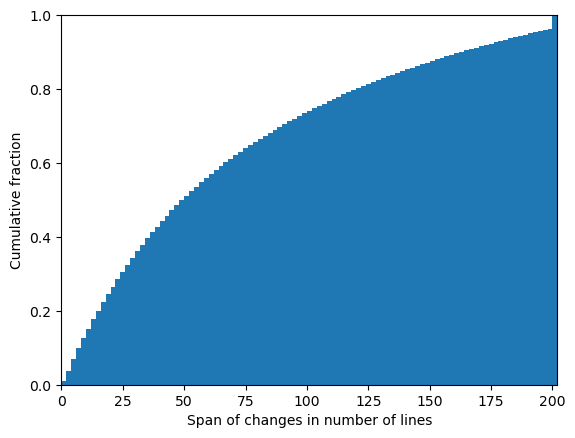

In [53]:
plt.hist(ds_clean["old_change_range"], bins=np.concatenate((np.linspace(0, 200, 101), [1e6])), cumulative=True, density=True);
plt.xlim(0, 202)
plt.ylim(0.0,1)
plt.xlabel("Span of changes in number of lines")
plt.ylabel("Cumulative fraction")

Text(0, 0.5, 'Cumulative fraction')

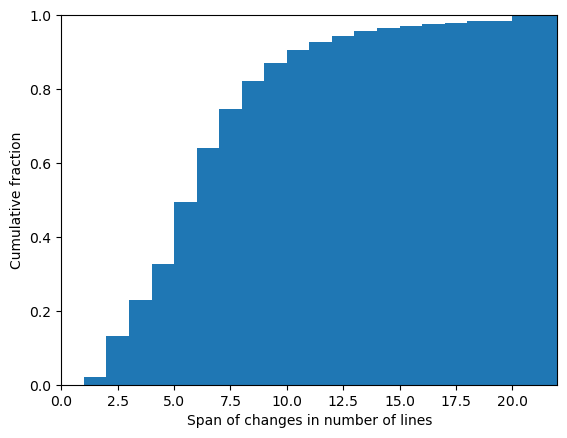

In [54]:
plt.hist([len(s.split())for s in ds_clean["subject"]], bins=np.concatenate((np.linspace(0, 20, 21), [1e6])), cumulative=True, density=True);
plt.xlim(0, 22)
plt.ylim(0.0,1)
plt.xlabel("Span of changes in number of lines")
plt.ylabel("Cumulative fraction")

In [67]:
FULL_RANGE_FRAC = 0.2
RANGE=32

def prepare_code(example):
    if np.random.random()<0.2:
        example["content"] = f"<commit_before>{example['old_contents']}<commit_msg>{example['subject']}<commit_after>{example['new_contents']}"
        example["size"] = len(example["content"])
    else:
        start_offset = np.random.randint(0, RANGE)
        end_offset = np.random.randint(0, RANGE)

        old_lines = example["old_contents"].splitlines()
        new_lines = example["new_contents"].splitlines()

        old_start = max(0, example["old_change_start"]- start_offset)
        new_start = max(0, example["new_change_start"]- start_offset)

        old_end = min(len(old_lines), example["old_change_end"] + end_offset)
        new_end = min(len(new_lines), example["new_change_end"] + end_offset)

        code_before = "\n".join(old_lines[old_start:old_end])
        code_after = "\n".join(new_lines[new_start:new_end])
        example["content"] = f"<commit_before>{code_before}<commit_msg>{example['subject']}<commit_after>{code_after}"
        example["size"] = len(example["content"])
    return example

In [57]:
uniques = set([r+"/"+filename for filename, r in zip(ds_clean["old_file"], ds_clean["repos"])])
print(len(uniques))

8276273


In [59]:
ds_clean

Dataset({
    features: ['commit', 'subject', 'message', 'repos', 'old_file', 'new_file', 'new_contents', 'old_contents', 'returncode', 'stderr', 'old_change_start', 'old_change_end', 'old_change_range', 'new_change_start', 'new_change_end', 'new_change_range', 'n_inserts', 'n_deletes', 'n_changes'],
    num_rows: 12249044
})

In [60]:
with open("programming-languages.json", "r") as f:
    file_exts = json.load(f)

exts = set(itertools.chain.from_iterable(file_exts.values()))
exts = {e.strip(".") for e in exts}

In [61]:
def check_uniques(example, uniques):
    """Check if current hash is still in set of unique hashes and remove if true."""
    if example["repos"]+"/"+example["old_file"] in uniques:
        uniques.remove(example["repos"]+"/"+example["old_file"])
        return True
    else:
        return False

def check_exts(example, exts):
    if example["old_file"].split(".")[-1] in exts:
        return True
    if example["old_file"].endswith("Dockerfile") or example["old_file"].endswith("Makefile"):
        return True
    return False

In [ ]:
ds_clean = ds_clean.filter(check_exts, fn_kwargs={"exts": exts}, num_proc=30)
ds_clean = ds_clean.filter(check_uniques, fn_kwargs={"uniques": uniques}, num_proc=1)

In [63]:
ds_clean

Dataset({
    features: ['commit', 'subject', 'message', 'repos', 'old_file', 'new_file', 'new_contents', 'old_contents', 'returncode', 'stderr', 'old_change_start', 'old_change_end', 'old_change_range', 'new_change_start', 'new_change_end', 'new_change_range', 'n_inserts', 'n_deletes', 'n_changes'],
    num_rows: 8273154
})

In [68]:
ds_clean = ds_clean.map(prepare_code, num_proc=30)

Map (num_proc=30):   0%|          | 0/8273154 [00:00<?, ? examples/s]

In [69]:
sum(ds_clean["size"])/1000/1000/1000

68.352518077

In [73]:
opt_out_github_login_the_stack_12 = set([el.lower() for el in opt_out_github_login_the_stack_12])

In [72]:
ds_clean[0]["repos"].split(",")

['keeguon/activerecord-jdbc-adapter',
 'jruby/activerecord-jdbc-adapter',
 'bruceadams/activerecord-jdbc-adapter',
 'bruceadams/activerecord-jdbc-adapter',
 'keeguon/activerecord-jdbc-adapter',
 'kares/activerecord-jdbc-adapter',
 'kares/activerecord-jdbc-adapter',
 'jruby/activerecord-jdbc-adapter',
 'jruby/activerecord-jdbc-adapter',
 'bruceadams/activerecord-jdbc-adapter',
 'keeguon/activerecord-jdbc-adapter',
 'kares/activerecord-jdbc-adapter']

In [77]:
def filter_opt_out(example):
    repo_names = example["repos"].split(",")
    try:
        repo_owners = [repo_name.split("/")[0].lower() for repo_name in repo_names]
    except:
        print(example["repos"])
    filtered_repo_names = [repo_name for repo_name, repo_owner in zip(repo_names, repo_owners) if repo_owner not in opt_out_github_login_the_stack_12]

    if len(filtered_repo_names)>0:
        example["repos"] = ",".join(filtered_repo_names)
        example["drop_opt_out"] = False
    else:
        example["repos"] = ""
        example["drop_opt_out"] = True
    return example

In [99]:
ds_opt_out = ds_clean.map(filter_opt_out, num_proc=30)

Loading cached processed dataset at /home/leandro/.cache/huggingface/datasets/json/data-97311ba745a469ed/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51/cache-521c393b44ec863a_*_of_00030.arrow


In [100]:
ds_opt_out

Dataset({
    features: ['commit', 'subject', 'message', 'repos', 'old_file', 'new_file', 'new_contents', 'old_contents', 'returncode', 'stderr', 'old_change_start', 'old_change_end', 'old_change_range', 'new_change_start', 'new_change_end', 'new_change_range', 'n_inserts', 'n_deletes', 'n_changes', 'content', 'size', 'drop_opt_out'],
    num_rows: 8273154
})

In [101]:
sum(ds_opt_out["drop_opt_out"])

66

In [102]:
ds_opt_out = ds_opt_out.filter(lambda x: not x["drop_opt_out"], num_proc=30)

Loading cached processed dataset at /home/leandro/.cache/huggingface/datasets/json/data-97311ba745a469ed/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51/cache-58a8158cf224b45e_*_of_00030.arrow


In [103]:
ds_opt_out

Dataset({
    features: ['commit', 'subject', 'message', 'repos', 'old_file', 'new_file', 'new_contents', 'old_contents', 'returncode', 'stderr', 'old_change_start', 'old_change_end', 'old_change_range', 'new_change_start', 'new_change_end', 'new_change_range', 'n_inserts', 'n_deletes', 'n_changes', 'content', 'size', 'drop_opt_out'],
    num_rows: 8273088
})

In [104]:
from collections import Counter

c = Counter([x.split(".")[-1] for x in ds_opt_out["old_file"]]).most_common()

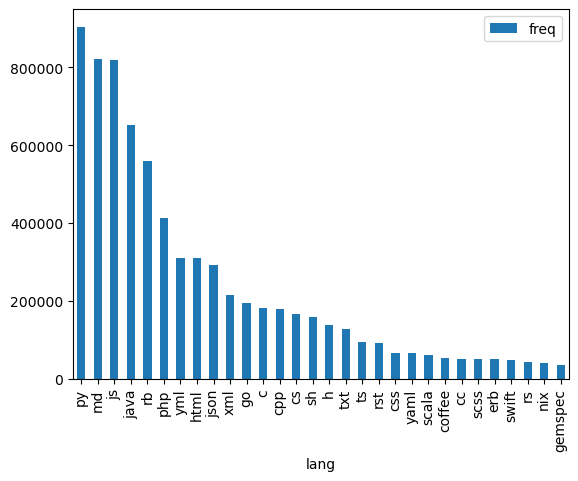

In [105]:
import pandas as pd

df = pd.DataFrame.from_dict({"lang":dict(c[:30]).keys(), "freq": dict(c[:30]).values()})
ax_ = df.plot.bar(x='lang', y='freq', rot=90)



In [106]:
DATA_SAMPLING = .5
DATA_EXT = {"json", "yml", "xml", "html", "yaml"}

def subsample_extensions(example):
    if example["old_file"].split(".")[-1] in DATA_EXT:
        if random.random()>DATA_SAMPLING:
            return False
        
    return True

In [107]:
ds_opt_out = ds_opt_out.filter(subsample_extensions, num_proc=30)

Filter (num_proc=30):   0%|          | 0/8273088 [00:00<?, ? examples/s]

In [108]:
ds_opt_out

Dataset({
    features: ['commit', 'subject', 'message', 'repos', 'old_file', 'new_file', 'new_contents', 'old_contents', 'returncode', 'stderr', 'old_change_start', 'old_change_end', 'old_change_range', 'new_change_start', 'new_change_end', 'new_change_range', 'n_inserts', 'n_deletes', 'n_changes', 'content', 'size', 'drop_opt_out'],
    num_rows: 7674345
})

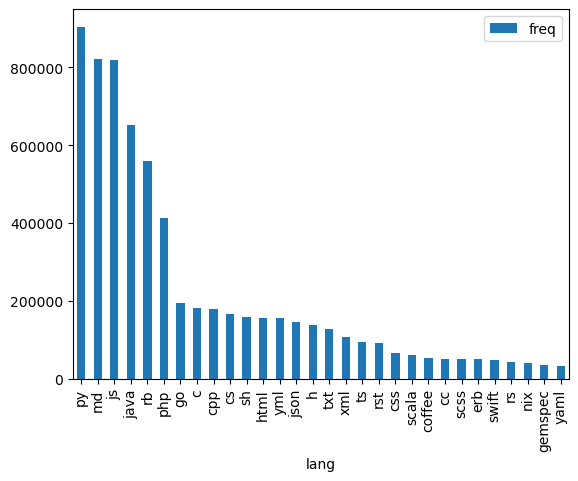

In [109]:
c = Counter([x.split(".")[-1] for x in ds_opt_out["old_file"]]).most_common()
c
df = pd.DataFrame.from_dict({"lang":dict(c[:30]).keys(), "freq": dict(c[:30]).values()})
ax_ = df.plot.bar(x='lang', y='freq', rot=90)


In [111]:
sum(ds_opt_out["size"])/1000/1000/1000

64.448053264

In [112]:
ds_opt_out

Dataset({
    features: ['commit', 'subject', 'message', 'repos', 'old_file', 'new_file', 'new_contents', 'old_contents', 'returncode', 'stderr', 'old_change_start', 'old_change_end', 'old_change_range', 'new_change_start', 'new_change_end', 'new_change_range', 'n_inserts', 'n_deletes', 'n_changes', 'content', 'size', 'drop_opt_out'],
    num_rows: 7674345
})

In [121]:
ds_final = ds_opt_out.remove_columns(["subject", "message", "new_contents", "old_contents", "returncode", "stderr", "old_change_start", "old_change_end", "old_change_range", "new_change_start", 'new_change_end', 'new_change_range', 'n_inserts', 'n_deletes', 'n_changes', "size",'drop_opt_out'])

In [122]:
ds_final

Dataset({
    features: ['commit', 'repos', 'old_file', 'new_file', 'content'],
    num_rows: 7674345
})

In [ ]:
ds_final.push_to_hub("git-commits-cleaned", private=True)

In [120]:
ds_final[0]

{'commit': '9fbfcc964b11e807c7e00a910acaaafabfa18316',
 'old_file': 'lib/arjdbc/postgresql/connection_methods.rb',
 'new_file': 'lib/arjdbc/postgresql/connection_methods.rb',
 'content': '<commit_before>ArJdbc::ConnectionMethods.module_eval do\n  def postgresql_connection(config)\n    begin\n      require \'jdbc/postgres\'\n      ::Jdbc::Postgres.load_driver(:require) if defined?(::Jdbc::Postgres.load_driver)\n    rescue LoadError # assuming driver.jar is on the class-path\n    end\n\n    host = config[:host] ||= ( config[:hostaddr] || ENV[\'PGHOST\'] || \'localhost\' )\n    port = config[:port] ||= ( ENV[\'PGPORT\'] || 5432 )\n    database = config[:database] || config[:dbname] || ENV[\'PGDATABASE\']\n\n    config[:url] ||= "jdbc:postgresql://#{host}:#{port}/#{database}"\n    config[:url] << config[:pg_params] if config[:pg_params] # should go away\n\n    config[:username] ||= ( config[:user] || ENV[\'PGUSER\'] || ENV_JAVA[\'user.name\'] )\n    config[:password] ||= ENV[\'PGPASSWORD\'